CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64


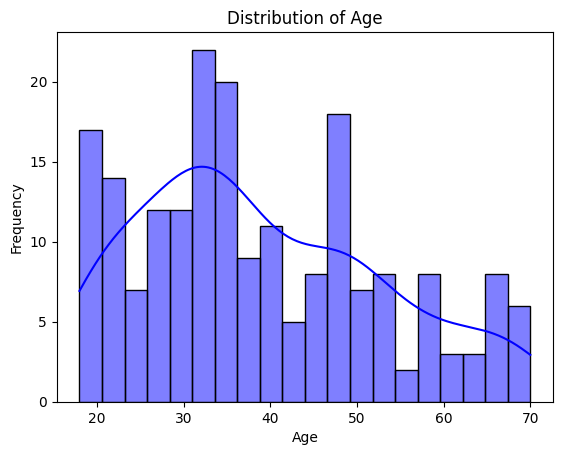

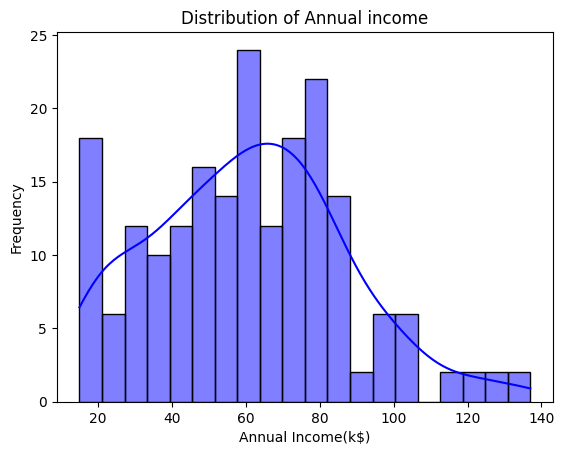

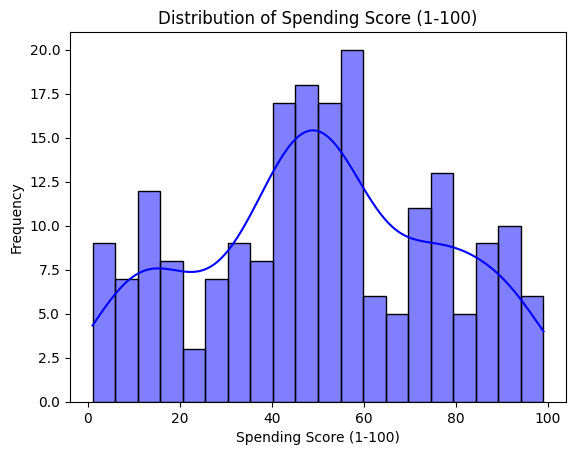

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

books = pd.read_csv("/content/customers_dataset.csv")
print(books.skew(numeric_only=True))

#Plot a histogram for book 'age'
sns.histplot(data=books, x='Age', kde=True, bins=20, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot a histogram for book 'annual income'
sns.histplot(data=books, x='Annual Income (k$)', kde=True, bins=20, color='blue')
plt.title('Distribution of Annual income')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Frequency')
plt.show()

# Plot a histogram for book 'Spending Score (1-100)'
sns.histplot(data=books, x='Spending Score (1-100)', kde=True, bins=20, color='blue')
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()



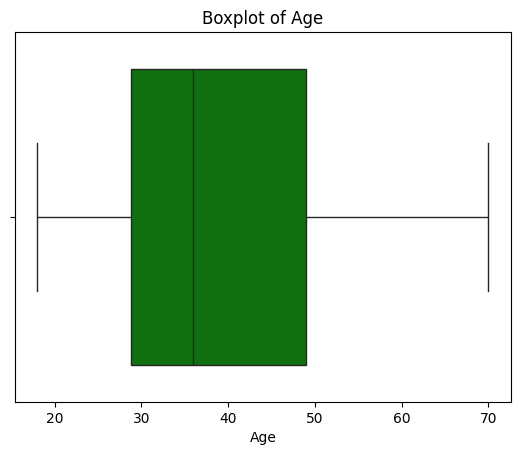

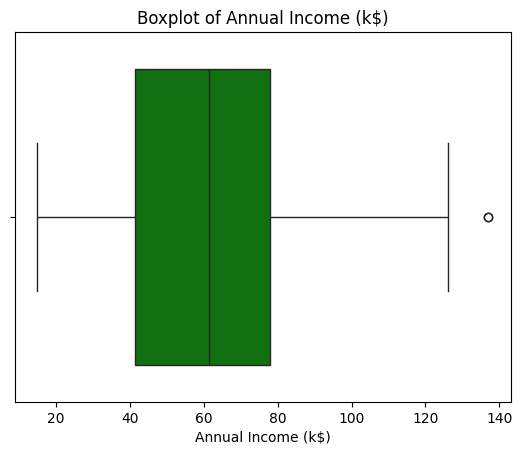

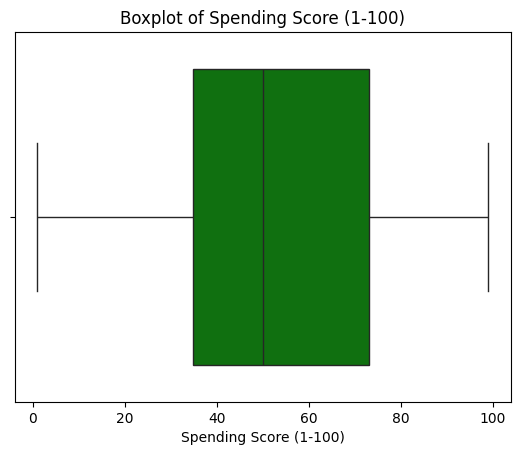

In [ ]:
# creating the boxplots
# boxplot of Age
sns.boxplot(data=books,x='Age',color='green')
plt.title('Boxplot of Age')
plt.show()

# boxplot of Annual Income (k$)
sns.boxplot(data=books,x='Annual Income (k$)',color='green')
plt.title('Boxplot of Annual Income (k$)')
plt.show()

# boxplot of Spending Score (1-100)
sns.boxplot(data=books,x='Spending Score (1-100)',color='green')
plt.title('Boxplot of Spending Score (1-100)')
plt.show()

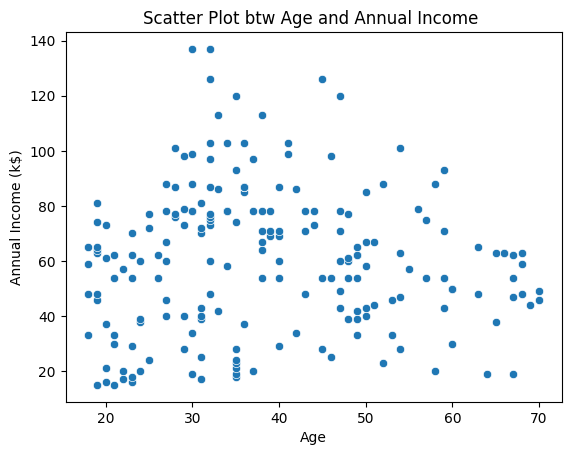

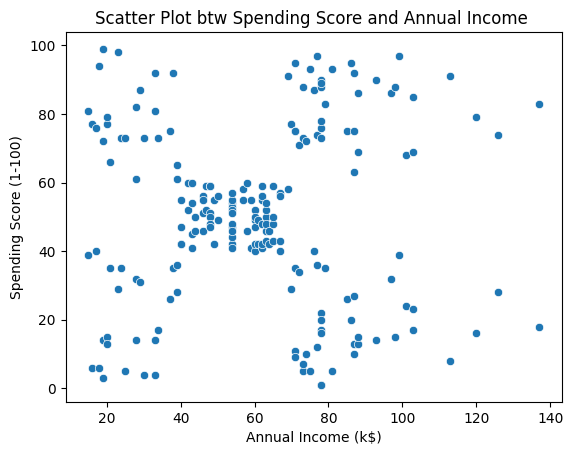

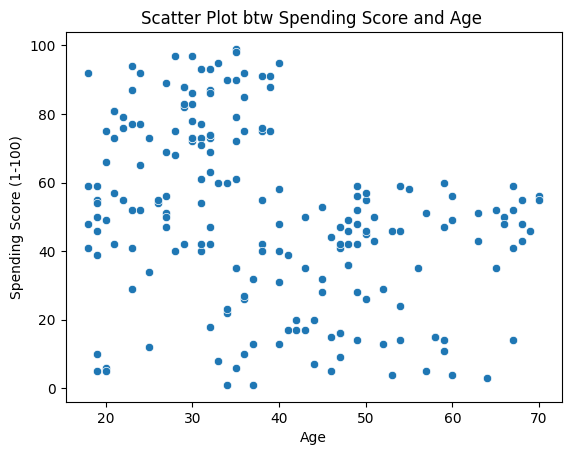

In [ ]:
# creating scatter plots betweeen different columns of dataframe books
# 1) Between Age and Annual Income
sns.scatterplot(data=books,x='Age',y='Annual Income (k$)')
plt.title('Scatter Plot btw Age and Annual Income ')
plt.show()
# 2) Between Annual Income and Spending Score
sns.scatterplot(data=books,x='Annual Income (k$)',y='Spending Score (1-100)')
plt.title('Scatter Plot btw Spending Score and Annual Income ')
plt.show()
# 3) Between Age and Spending Score
sns.scatterplot(data=books,x='Age',y='Spending Score (1-100)')
plt.title('Scatter Plot btw Spending Score and Age ')
plt.show()

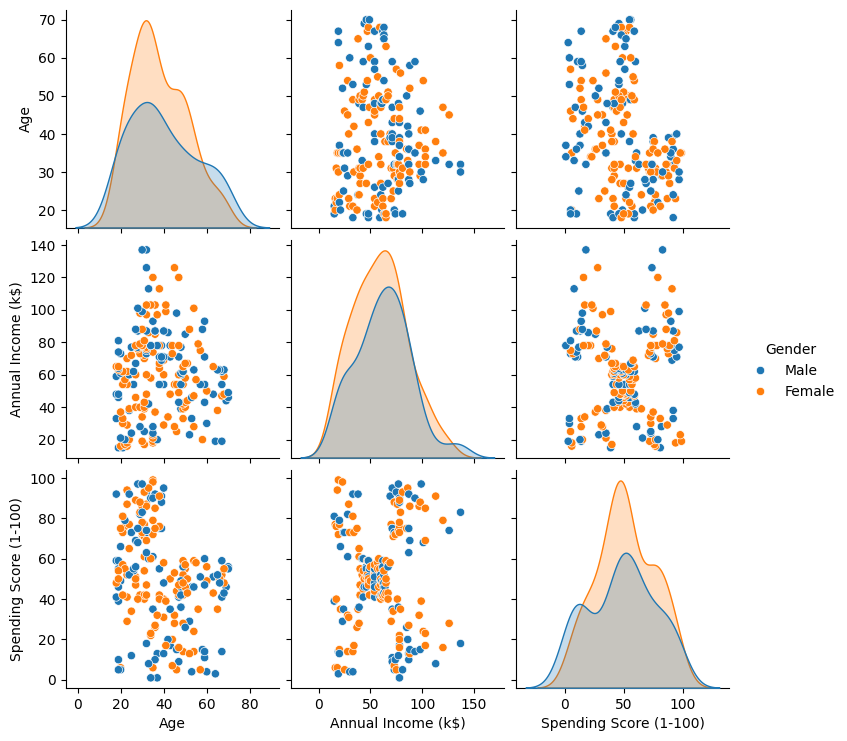

In [ ]:
#paiplot
# Select only numeric columns with ignoring customerID
numeric_columns = books.select_dtypes(include=["number"]).columns.drop("CustomerID")

# Plot using the original df, restrict to numeric columns, and use hue from non-numeric column
sns.pairplot(books, vars=numeric_columns, hue="Gender")
plt.show()

In [ ]:
#end of part-1(Data Visualisation) of assignment

In [ ]:
# Start of Part-2(Skewness) of assignment

In [ ]:
#Check Skewness
import pandas as pd

# Select all numeric columns (integers + floats)
cont_cols = books.select_dtypes(include='number').drop(columns='CustomerID')

# Create empty dictionary to store skew values
skew = {}

# Loop through numeric columns and calculate skewness
for col in cont_cols:
    skewness = books[col].skew()
    skew[col] = skewness
    print(f"Skewness of {col}: {skewness:.2f}")
    if(skewness > 0) :
      print(f"{col} is positively skewed")
    else:
      print(f"{col} is negatively skewed")

# Create a DataFrame from the skew dictionary
skew_frame = pd.DataFrame({
    'Feature': list(skew.keys()),
    'Skew Value': list(skew.values())
})
print("\n",skew_frame)


Skewness of Age: 0.49
Age is positively skewed
Skewness of Annual Income (k$): 0.32
Annual Income (k$) is positively skewed
Skewness of Spending Score (1-100): -0.05
Spending Score (1-100) is negatively skewed

                   Feature  Skew Value
0                     Age    0.485569
1      Annual Income (k$)    0.321843
2  Spending Score (1-100)   -0.047220


In [ ]:
# 2) Applying Transformations:

before transformation skew value is : 0.48556885096681657
after transformation skew value is : -0.08949060168904396
skewness decreased


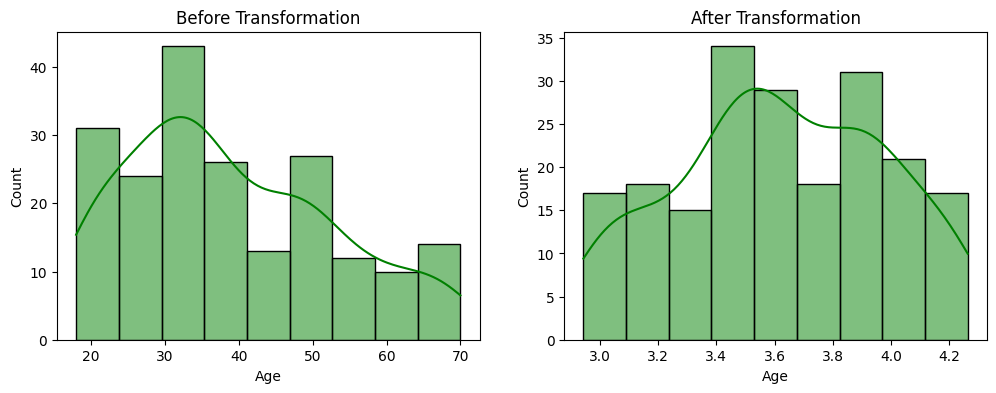

before transformation skew value is : 0.3218425498619055
after transformation skew value is : -0.7359971613306436
skewness increased


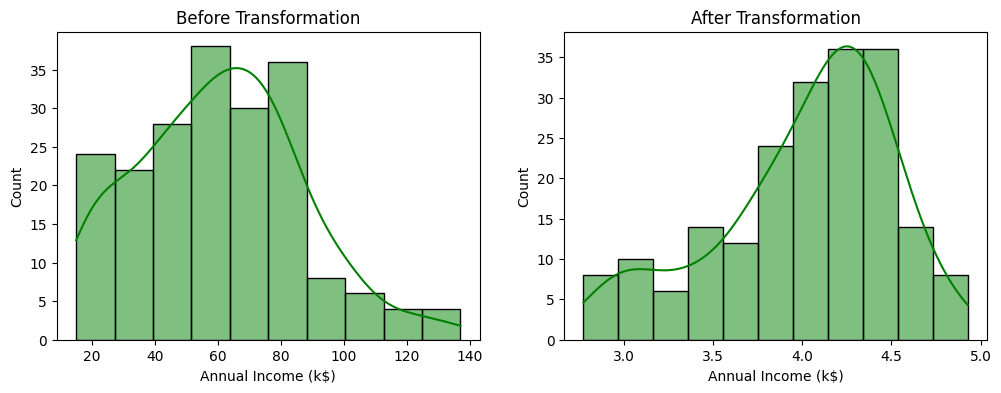

before transformation skew value is : -0.047220201374263374
after transformation skew value is : -1.5656045376436187
skewness increased


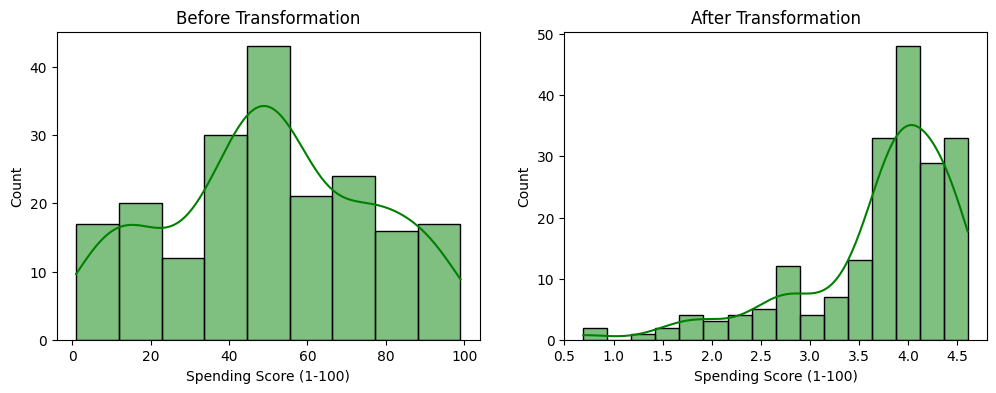

In [ ]:
## 1)Log Transformation:
# : ON column Age
# Creating log function
log_transform = lambda x : np.log1p(x)

books['Age'].apply(log_transform)

print('before transformation skew value is :', books['Age'].skew())
print('after transformation skew value is :',np.log1p(books['Age']).skew())

if(abs(books['Age'].skew())>abs(np.log1p(books['Age']).skew())):
  print("skewness decreased")
else:
  print("skewness increased")
# plotting the distribution
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((books['Age']), ax=ax1, color='green', kde=True)
sns.histplot(np.log1p(books['Age']), ax=ax2, color='green', kde=True)
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

plt.show()

# On Column Annual Income (k$)

books['Annual Income (k$)'].apply(log_transform)

print('before transformation skew value is :', books['Annual Income (k$)'].skew())
print('after transformation skew value is :',np.log1p(books['Annual Income (k$)']).skew())

if(abs(books['Annual Income (k$)'].skew())>abs(np.log1p(books['Annual Income (k$)']).skew())):
  print("skewness decreased")
else:
  print("skewness increased")
# plotting the distribution
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((books['Annual Income (k$)']), ax=ax1, color='green', kde=True)
sns.histplot(np.log1p(books['Annual Income (k$)']), ax=ax2, color='green', kde=True)
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

plt.show()

# : ON column Spending Score (1-100)
books['Spending Score (1-100)'].apply(log_transform)

print('before transformation skew value is :', books['Spending Score (1-100)'].skew())
print('after transformation skew value is :',np.log1p(books['Spending Score (1-100)']).skew())
if(abs(books['Spending Score (1-100)'].skew())>abs(np.log1p(books['Spending Score (1-100)']).skew())):
  print("skewness decreased")
else:
  print("skewness increased")
# plotting the distribution
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((books['Spending Score (1-100)']), ax=ax1, color='green', kde=True)
sns.histplot(np.log1p(books['Spending Score (1-100)']), ax=ax2, color='green', kde=True)
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

plt.show()

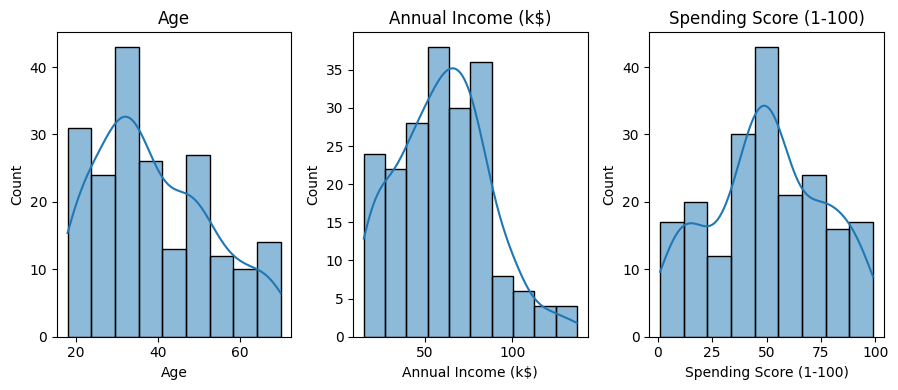

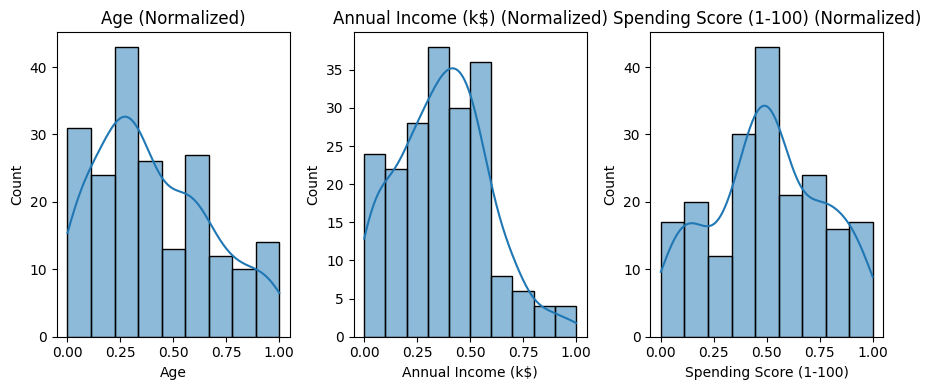

In [ ]:
# :) MinMax Transfromations
from sklearn.preprocessing import MinMaxScaler
# Drop CustomerID and convert Gender to numeric
books = books.drop('CustomerID', axis=1)
books['Gender'] = books['Gender'].map({'Male': 0, 'Female': 1})

# Visualize the distribution of features  before normalization
plt.figure(figsize=(12, 4))
for i, feature in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 4, i+1)
    sns.histplot(books[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Initialize the MinMaxScaler
scaler_features = MinMaxScaler()
# scaler_price = MinMaxScaler()

# Normalize the features
features_to_normalize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
books[features_to_normalize] = scaler_features.fit_transform(books[features_to_normalize])

# Normalize the target variable
#books['Price'] = scaler_price.fit_transform(books[['Price']])

# Visualize the distribution of features after normalization
plt.figure(figsize=(12, 4))
for i, feature in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 4, i+1)
    sns.histplot(books[feature], kde=True)
    plt.title(f'{feature} (Normalized)')
plt.tight_layout()
plt.show()


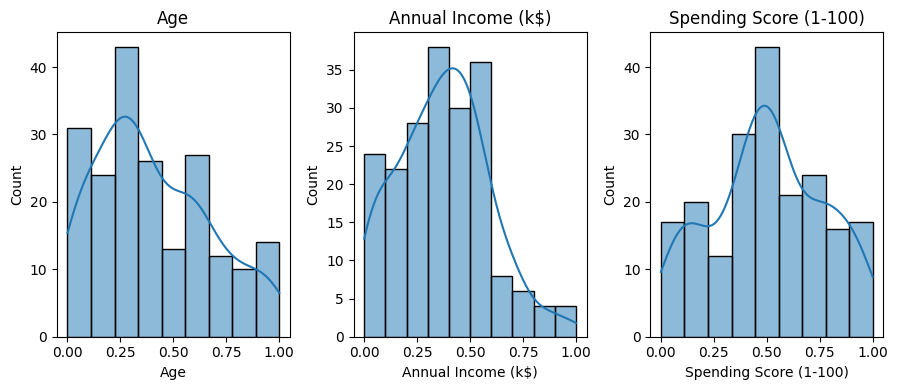

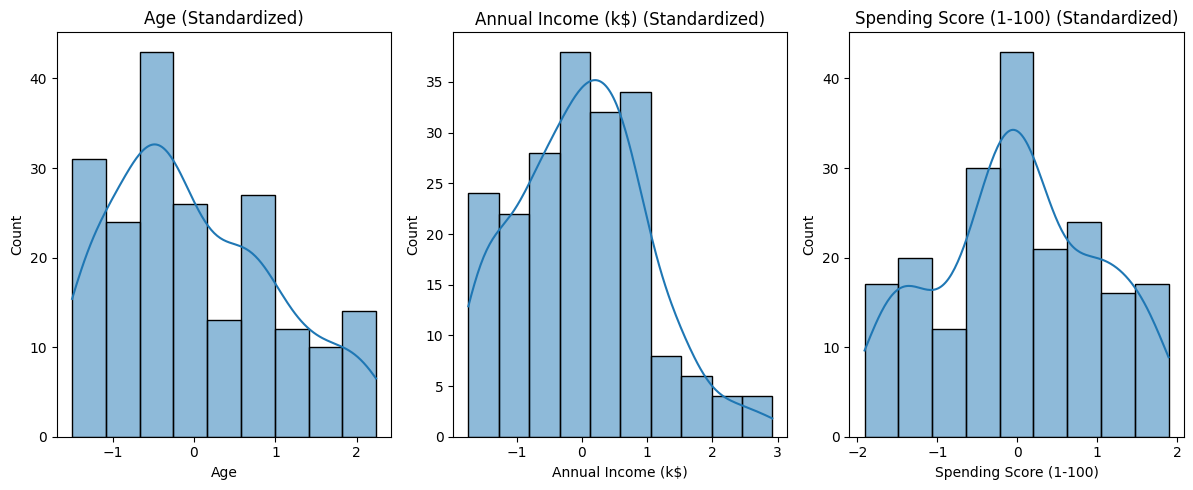

In [ ]:
# 3) StandardScaler
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of features before normalization
plt.figure(figsize=(12, 4))
for i, feature in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 4, i+1)
    sns.histplot(books[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the features
features_to_normalize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
books[features_to_normalize] = scaler.fit_transform(books[features_to_normalize])

# Visualize the distribution after normalization
plt.figure(figsize=(16, 5))
for i, feature in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 4, i+1)
    sns.histplot(books[feature], kde=True)
    plt.title(f'{feature} (Standardized)')
plt.tight_layout()
plt.show()

Before square root transformation (Age) skew: 0.4855688509668167
After square root transformation (Age) skew: -0.2984989267356549
skewness decreased


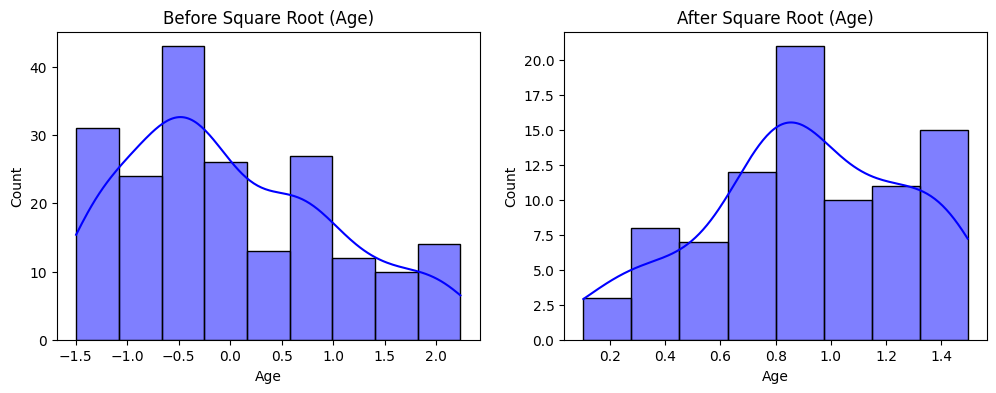

Before square root transformation (Income) skew: 0.32184254986190625
After square root transformation (Income) skew: 0.2939319855652985
skewness decreased


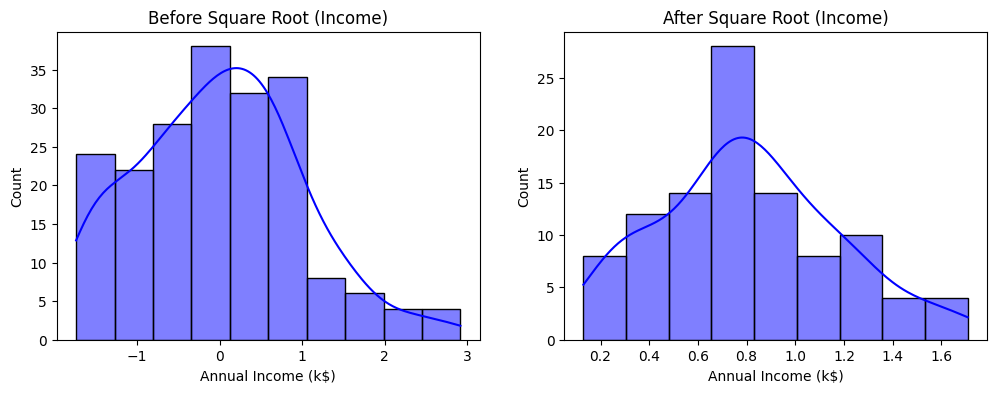

Before square root transformation (Spending Score (1-100)) skew: -0.047220201374263256
After square root transformation (Spending Score (1-100)) skew: -0.26825910969266464
skewness increased


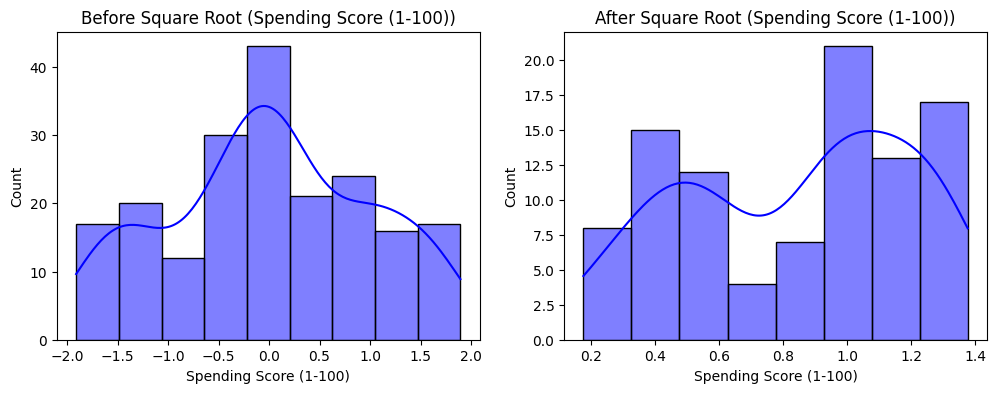

In [ ]:
# Square Transformation :
# Square Root Transformation on 'Age'
sqrt_transform = lambda x: np.sqrt(x)

print('Before square root transformation (Age) skew:', books['Age'].skew())
print('After square root transformation (Age) skew:', sqrt_transform(books['Age']).skew())

if(abs(books['Age'].skew())>abs(sqrt_transform(books['Age']).skew())):
  print("skewness decreased")
else:
  print("skewness increased")
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot(books['Age'], ax=ax1, color='blue', kde=True)
sns.histplot(sqrt_transform(books['Age']), ax=ax2, color='blue', kde=True)
ax1.set_title('Before Square Root (Age)')
ax2.set_title('After Square Root (Age)')
plt.show()

# Square Root on 'Annual Income (k$)'
print('Before square root transformation (Income) skew:', books['Annual Income (k$)'].skew())
print('After square root transformation (Income) skew:', sqrt_transform(books['Annual Income (k$)']).skew())
if(abs(books['Annual Income (k$)'].skew())>abs(sqrt_transform(books['Annual Income (k$)']).skew())):
  print("skewness decreased")
else:
  print("skewness increased")

fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot(books['Annual Income (k$)'], ax=ax1, color='blue', kde=True)
sns.histplot(sqrt_transform(books['Annual Income (k$)']), ax=ax2, color='blue', kde=True)
ax1.set_title('Before Square Root (Income)')
ax2.set_title('After Square Root (Income)')
plt.show()

# Square Root Transformation on 'Spending Score (1-100)'
sqrt_transform = lambda x: np.sqrt(x)

print('Before square root transformation (Spending Score (1-100)) skew:', books['Spending Score (1-100)'].skew())
print('After square root transformation (Spending Score (1-100)) skew:', sqrt_transform(books['Spending Score (1-100)']).skew())

if(abs(books['Spending Score (1-100)'].skew())>abs(sqrt_transform(books['Spending Score (1-100)']).skew())):
  print("skewness decreased")
else:
  print("skewness increased")
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot(books['Spending Score (1-100)'], ax=ax1, color='blue', kde=True)
sns.histplot(sqrt_transform(books['Spending Score (1-100)']), ax=ax2, color='blue', kde=True)
ax1.set_title('Before Square Root (Spending Score (1-100))')
ax2.set_title('After Square Root (Spending Score (1-100))')
plt.show()



[Annual Income (k$)]
Before Box-Cox skew: 1.2909798565740864
After Box-Cox skew: -0.08 | Lambda: 0.34


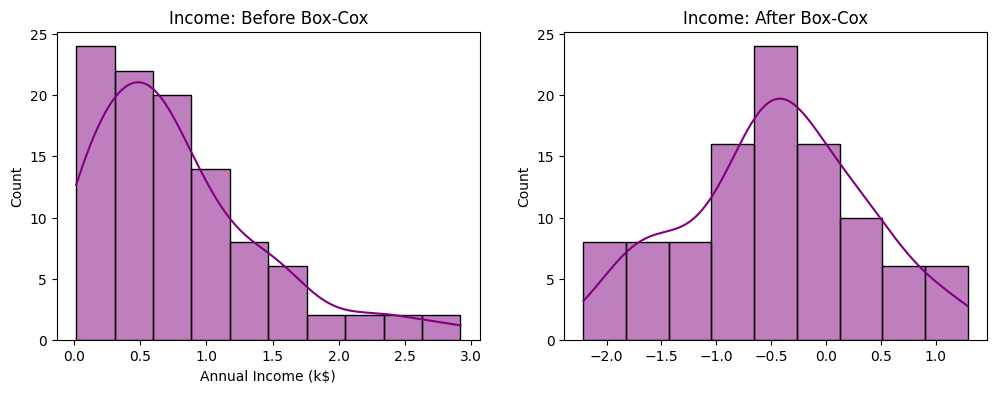


[Spending Score (1-100)]
Before Box-Cox skew: 0.18337562458972356
After Box-Cox skew: -0.25 | Lambda: 0.52


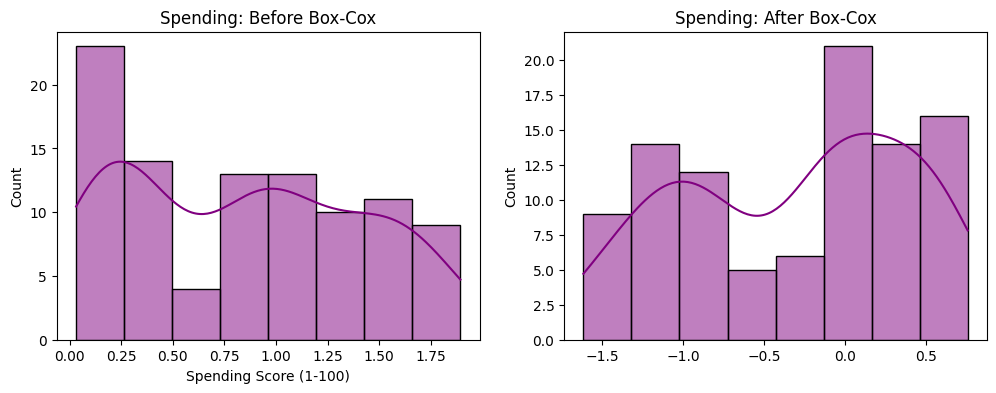


[Age]
Before Box-Cox skew: 0.4389326080532212
After Box-Cox skew: -0.20 | Lambda: 0.55


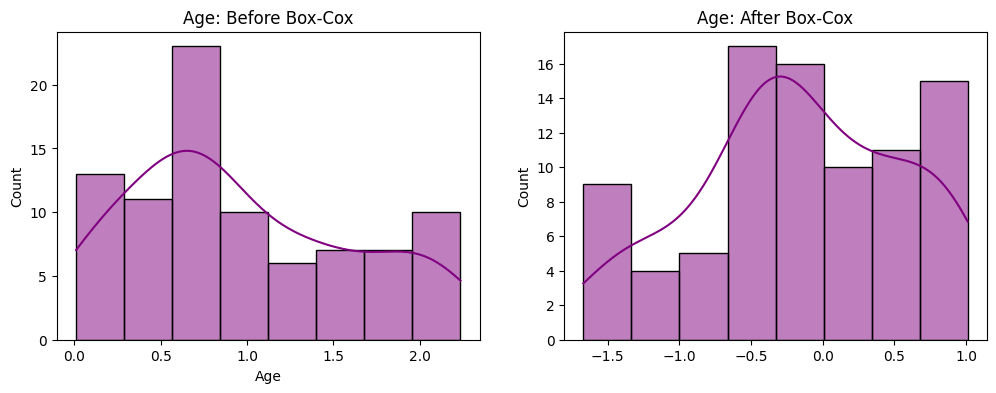

In [ ]:

from scipy import stats


# 1. Box-Cox on 'Annual Income (k$)'
income_positive = books['Annual Income (k$)'][books['Annual Income (k$)'] > 0]
income_boxcox, income_lambda = stats.boxcox(income_positive)

print('\n[Annual Income (k$)]')
print('Before Box-Cox skew:', income_positive.skew())
print(f'After Box-Cox skew: {pd.Series(income_boxcox).skew():.2f} | Lambda: {income_lambda:.2f}')

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(income_positive, kde=True, ax=ax1, color='purple')
sns.histplot(income_boxcox, kde=True, ax=ax2, color='purple')
ax1.set_title("Income: Before Box-Cox")
ax2.set_title("Income: After Box-Cox")
plt.show()

# 2. Box-Cox on 'Spending Score (1-100)'
spending_positive = books['Spending Score (1-100)'][books['Spending Score (1-100)'] > 0]
spending_boxcox, spending_lambda = stats.boxcox(spending_positive)

print('\n[Spending Score (1-100)]')
print('Before Box-Cox skew:', spending_positive.skew())
print(f'After Box-Cox skew: {pd.Series(spending_boxcox).skew():.2f} | Lambda: {spending_lambda:.2f}')

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(spending_positive, kde=True, ax=ax1, color='purple')
sns.histplot(spending_boxcox, kde=True, ax=ax2, color='purple')
ax1.set_title("Spending: Before Box-Cox")
ax2.set_title("Spending: After Box-Cox")
plt.show()

# 3. Box-Cox on 'Age'
age_positive = books['Age'][books['Age'] > 0]
age_boxcox, age_lambda = stats.boxcox(age_positive)

print('\n[Age]')
print('Before Box-Cox skew:', age_positive.skew())
print(f'After Box-Cox skew: {pd.Series(age_boxcox).skew():.2f} | Lambda: {age_lambda:.2f}')

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(age_positive, kde=True, ax=ax1, color='purple')
sns.histplot(age_boxcox, kde=True, ax=ax2, color='purple')
ax1.set_title("Age: Before Box-Cox")
ax2.set_title("Age: After Box-Cox")
plt.show()



In [ ]:
# Analysis of Mean and Standard Deviation after scaling with different methods.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np
from scipy.stats import skew

# Use only positive values (log and Box-Cox require > 0)
age = books['Age'][books['Age'] > 0].copy()

# --- 1. MinMaxScaler ---
minmax = MinMaxScaler()
age_minmax = pd.Series(minmax.fit_transform(age.values.reshape(-1, 1)).flatten(), index=age.index)

# --- 2. StandardScaler ---
standard = StandardScaler()
age_standard = pd.Series(standard.fit_transform(age.values.reshape(-1, 1)).flatten(), index=age.index)

# --- 3. Log Transformation ---
age_log = pd.Series(np.log1p(age), index=age.index)

# --- 4. Square Transformation ---
age_square = pd.Series(np.square(age), index=age.index)

# --- Create comparison DataFrame ---
transformed_stats = pd.DataFrame({
    "Transformation": ["Original", "MinMax", "Standard", "Log", "Square"],
    "Mean": [
        age.mean(),
        age_minmax.mean(),
        age_standard.mean(),
        age_log.mean(),
        age_square.mean()
    ],
    "Std Dev": [
        age.std(),
        age_minmax.std(),
        age_standard.std(),
        age_log.std(),
        age_square.std()
    ],
    "Skewness": [
        age.skew(),
        age_minmax.skew(),
        age_standard.skew(),
        age_log.skew(),
        age_square.skew()
    ]
})

# Round for readability
print(transformed_stats.round(2))


  Transformation  Mean  Std Dev  Skewness
0       Original  0.96     0.65      0.44
1         MinMax  0.43     0.29      0.44
2       Standard  0.00     1.01      0.44
3            Log  0.62     0.33     -0.05
4         Square  1.34     1.48      1.13


In [ ]:
#Clusteing

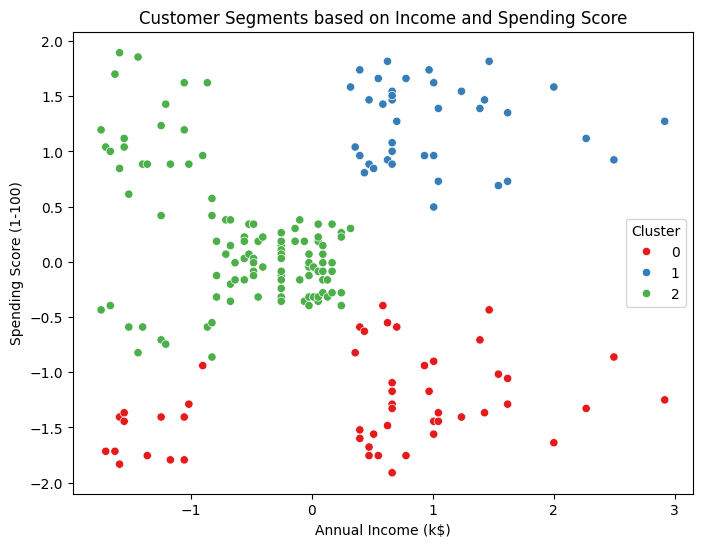

Cluster Centers (Annual Income vs Spending Score):
[[0.46174863 0.15966387]
 [0.58638083 0.82783883]
 [0.25700447 0.54526902]]


In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Select only the relevant features for clustering
features = books[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(features)

# Run KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to the original booksFrame
books['Cluster'] = labels

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=books,
    palette='Set1'
)
plt.title("Customer Segments based on Income and Spending Score")
plt.show()

#accessing the cluster centre
print("Cluster Centers (Annual Income vs Spending Score):")
print(kmeans.cluster_centers_)



